In [127]:
import numpy as np
from sklearn.linear_model import LinearRegression
from itertools import combinations
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from itertools import combinations

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.

__Ответ__: 0.76342462

In [128]:
def sum_of_squares(samples: np.ndarray) -> float:
    """Сумма квадратов отклонений.
    """
    return ((samples - samples.mean()) ** 2).sum()

X = np.array( [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

y =np.array( [9.26193358, 9.700363, 8.67214805, 8.74796974, 6.18689108,
        7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

def determination_coef(errors: np.ndarray, y_true: np.ndarray, y_pred: np.ndarray) -> float:
    square_errors = ((errors - errors.mean()) ** 2).sum()
    square_true = ((y_true - y_true.mean()) ** 2).sum()
    R = 1 - square_errors / square_true
    R_n = np.corrcoef(y_true, y_pred)**2
    R_sk = r2_score(y_true, y_pred)
    print(f'R2 coef: {R}, R2 coef from sq. cov: {R_n[0,1]}, R2 coef from sklearn: {R_sk}')
    return R
def linear_regression(X: np.ndarray, y: np.ndarray, indices: tuple) -> float:
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X[:, indices]))
    print(f'Number of factors (features): {X.shape[1]-1}, cols: {indices}')
    X_ = X.T.dot(X)
    X_ = np.linalg.inv(X_)
    b = X_.dot(X.T).dot(y)
    y_pred = X.dot(b)
    errors = y - y_pred
    print(f'Mean error: {errors.mean():5f}')
    R = determination_coef(errors=errors, y_true=y, y_pred=y_pred)
    return R
indices = np.arange(4)
r_scores = np.array([])
subsets = []
for idx in combinations(indices, r=X.shape[1]-2):
    R = linear_regression(X, y, idx)
    r_scores = np.append(r_scores, R)
    subsets.append(idx)
subsets[np.argmax(r_scores)]
linear_regression(StandardScaler().fit_transform(X), y, (0,2))
regr = LinearRegression()
regr.fit(X[:, (0,2)], y)
y_pred = regr.predict(X[:, (0,2)])
r2_score(y, y_pred)

Number of factors (features): 2, cols: (0, 1)
Mean error: 0.000000
R2 coef: 0.18113594742585215, R2 coef from sq. cov: 0.18113594742585226, R2 coef from sklearn: 0.18113594742585215
Number of factors (features): 2, cols: (0, 2)
Mean error: -0.000000
R2 coef: 0.7634246238793152, R2 coef from sq. cov: 0.7634246238793152, R2 coef from sklearn: 0.7634246238793152
Number of factors (features): 2, cols: (0, 3)
Mean error: 0.000000
R2 coef: 0.4532966783144077, R2 coef from sq. cov: 0.45329667831440756, R2 coef from sklearn: 0.4532966783144077
Number of factors (features): 2, cols: (1, 2)
Mean error: -0.000000
R2 coef: 0.547948273403901, R2 coef from sq. cov: 0.547948273403901, R2 coef from sklearn: 0.547948273403901
Number of factors (features): 2, cols: (1, 3)
Mean error: 0.000000
R2 coef: 0.6062055761129932, R2 coef from sq. cov: 0.6062055761129934, R2 coef from sklearn: 0.6062055761129932
Number of factors (features): 2, cols: (2, 3)
Mean error: -0.000000
R2 coef: 0.622441987650532, R2 coe

0.763424623879315

_Задача 2__

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

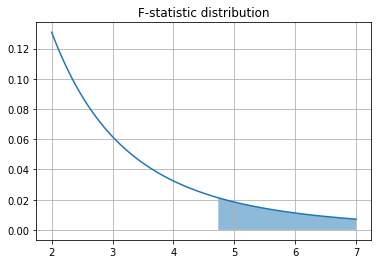

Number of factors (features): 2, cols: (0, 2)
Mean error: -0.000000
R2 coef: 0.7634246238793152, R2 coef from sq. cov: 0.7634246238793152, R2 coef from sklearn: 0.7634246238793152
Ответ: 1


In [130]:
n = X.shape[0]
m = 2
k1 = m
k2 = n - m - 1
k1, k2
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
ox = np.linspace(2, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.title('F-statistic distribution')
plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)
plt.grid()
plt.show()
R = linear_regression(X, y, (0,2))
F = (R / k1) / ((1 - R) / k2)
p_value = 1 - stats.f.cdf(F, dfn=k1, dfd=k2)
p_value
print('Ответ: 1')

__Задача 3__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.


In [133]:
A = np.zeros((2509,))
B = np.zeros((1465,))
A[-77:] = 1
B[-60:] = 1
n1 = A.size
n2 = B.size

s1 = A.std(ddof=1)
s2 = B.std(ddof=1)
s_delta = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)
t = (A.mean() - B.mean()) / s_delta
df = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2 / \
    ((s1 ** 2 / n1) ** 2 / (n1 - 1) + (s2 ** 2 / n2) ** 2 / (n2 - 1))
alpha = 0.05

t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)
p_left = stats.t.cdf(t, df=df)
p_right = 1 - stats.t.cdf(t, df=df)

pvalue = 2 * min(p_left, p_right)

print(f'0 ' if pvalue > alpha else '1')

0 
